## Statistical analysis and hypothesis testing

### Navigation:
* [README](https://github.com/Janeweightman/Climate-Change-Impact-on-Agriculture-/blob/main/README.md)
* [Data Cleaning](https://github.com/Janeweightman/Climate-Change-Impact-on-Agriculture-/blob/main/jupyter_notebooks/data-cleaning.ipynb)
* [EDA Visualisations in Python](https://github.com/Janeweightman/Climate-Change-Impact-on-Agriculture-/blob/main/jupyter_notebooks/data-visualisations.ipynb)
* [Tableau Dashboard](https://public.tableau.com/app/profile/jane.weightman/viz/climate-change-agriculture/MainStory?publish=yes)
* [Machine Learning](https://github.com/Janeweightman/Climate-Change-Impact-on-Agriculture-/blob/main/jupyter_notebooks/machinelearning.ipynb)
* [Raw Data](https://github.com/Janeweightman/Climate-Change-Impact-on-Agriculture-/blob/main/data/climate-agriculture.csv)
* [Clean Data](https://github.com/Janeweightman/Climate-Change-Impact-on-Agriculture-/blob/main/data/clean-agriculturedata.csv)

In order to test our hypotheses we need to choose the appropriate statistical tests and determine if the relationships are statistically significant. We need to assess the the distribution of each varaible to choose the appropriate test for each hypothesis.

### Import libraries

In [12]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import scipy.stats as stats

### Load the clean data ready for analysis

In [2]:
df = pd.read_csv('../data/clean-agriculturedata.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,Brazil,South East,Rice,2.64,514.15,21.96,0.639,4,15.95,25.39,42.58,85.01,Drought-resistant Crops,116.07
1,1995,India,Punjab,Vegetables,13.98,1940.83,6.11,4.100,6,74.79,33.24,74.95,96.05,Drought-resistant Crops,1026.14
2,1996,Brazil,South,Rice,34.76,247.44,8.42,2.520,2,52.69,6.56,10.86,56.99,Water Management,837.28
3,1994,China,Central,Corn,19.10,2042.70,4.88,1.520,8,93.98,42.48,52.78,65.33,No Adaptation,369.90
4,2018,Nigeria,North Central,Vegetables,-2.34,2716.87,23.37,1.593,6,22.09,41.06,8.44,99.04,Drought-resistant Crops,555.35


### Hypothesis 1: Soil Health Drives Economic Productivity

Soil health is key for optimal crop yeilds as plants gain key nutrients from the [soil such as Nitrogen, Phosphorus and Potash](https://www.yara.co.uk/grow-the-future/sustainable-farming/soil-health/). We predict that high soil health will be reflectect in economic growth.

#### Checking the distribution of the varaibles to choose the right statistical test

#### density plots to check the distributions

##### Soil Health

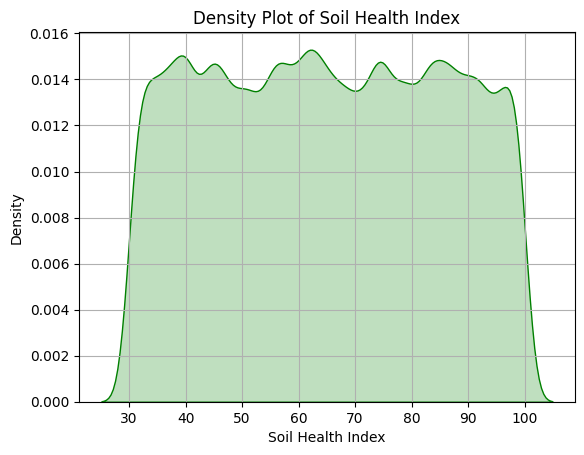

In [9]:
sns.kdeplot(data=df, x='Soil_Health_Index', fill=True, color='green', bw_adjust=0.5) #This was created with help from co-pilot
plt.title('Density Plot of Soil Health Index')
plt.xlabel('Soil Health Index')
plt.ylabel('Density')
plt.grid(True)
plt.show()


Soil health seems to be a near uniform distribution with only slight ups and downs.

#### Economic Impact

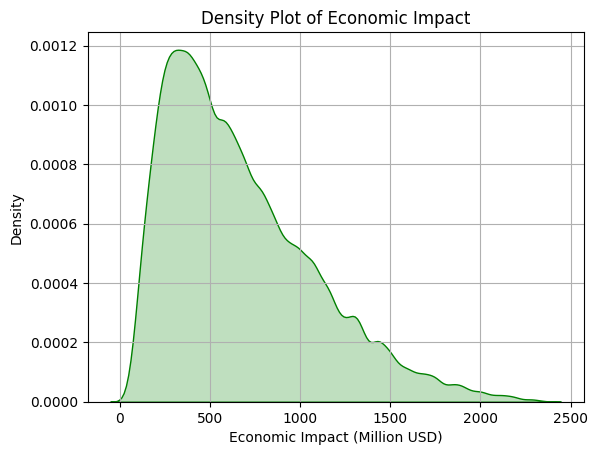

In [10]:
sns.kdeplot(data=df, x='Economic_Impact_Million_USD', fill=True, color='green', bw_adjust=0.5) #This was created with help from co-pilot
plt.title('Density Plot of Economic Impact')
plt.xlabel('Economic Impact (Million USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Economic impact is also not normally distributed with a large degree of asymmetry towards lower values

As they are not normally distributed we will use a non parametric test.

#### Spearman Rank Correlation for soil heath index and economic impact

In [14]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(df['Economic_Impact_Million_USD'], df['Soil_Health_Index']) #This code was created with help from co-pilot
print(f"Spearman correlation coefficient: {rho:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation coefficient: -0.009
P-value: 0.410


With a high P-value of 0.410 it is not statistically significant and with a [Spearman correlation coefficient of -0.009 the relationship is very weak](https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf). Thus we can reject the alternative hypothesis that soil health is a driver for economic impact. This surprising result, suggests that farmers should not focus on soil health to boost their economic productivity, moreover a possible explanation is that soil health is fairly uniform across the data set, so any pattern that might be there cannot be shown in the data. 

#### Visualising the results with a scatter plot

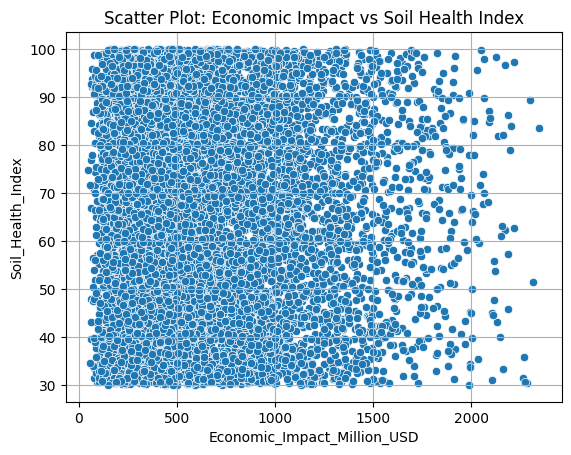

In [24]:
sns.scatterplot(data=df, x='Economic_Impact_Million_USD', y='Soil_Health_Index') #This was created with help from co-pilot
plt.title('Scatter Plot: Economic Impact vs Soil Health Index')
plt.grid(True)
plt.show()


As we can see the density of soil Health Index data points are very uniform, whereas the economic impact data points become less frequent in the higher values. This reflects what we see in the density distribution plots we graphed earlier, with soil health index being near uniform in distribution and economic impact being more dense towards the lower values. 

### Hypothesis 2: Crop Yields Boost Economic growth.

This might seem obvious, however it is possible that beyond a certain point increased crop yields do not result in extra econmic growth. 

##### Density plot to assess the distribution of crop yields

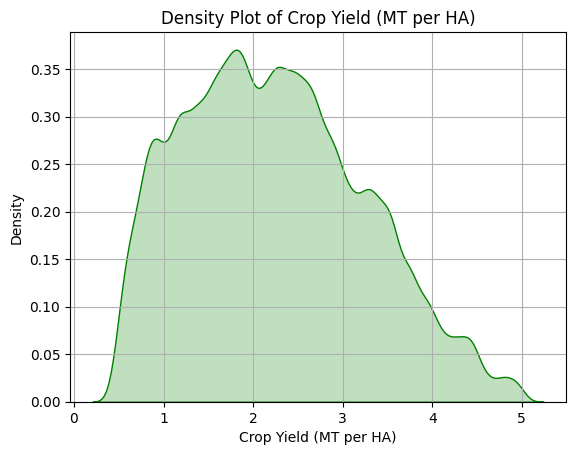

In [30]:
sns.kdeplot(data=df, x='Crop_Yield_MT_per_HA', fill=True, color='green', bw_adjust=0.5) #This was created with help from co-pilot
plt.title('Density Plot of Crop Yield (MT per HA)')
plt.xlabel('Crop Yield (MT per HA)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Crop Yields are not normally distributed, meaning non parametric tests are required.

#### Spearman Rank Correlation for Crop Yield and Economic Impact

In [37]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(df['Crop_Yield_MT_per_HA'], df['Economic_Impact_Million_USD']) #This code was created with help from co-pilot
print(f"Spearman correlation coefficient: {rho:.3f}")
print(f"P-value: {p_value:.5f}")


Spearman correlation coefficient: 0.735
P-value: 0.00000


With an extremely low P value well below 0.05 and a high spearman coefficient of 0.735 this result is highly statistically significant and demonstrates a [strong monotonic relationship](https://statkat.com/monotonic-relationships.php).

### Hypothesis 3: different adaptation strategies have more positive impacts on crop yield

#### Check the frequency of each adaptation strategy

In [39]:
print(df['Adaptation_Strategies'].value_counts())


Adaptation_Strategies
Water Management           1838
No Adaptation              1805
Organic Farming            1799
Drought-resistant Crops    1787
Crop Rotation              1771
Name: count, dtype: int64


Each strategy has similar values. 

#### Kruskal-Wallace H test

Since we are using a nominal variable and a non normally distributed variable we choose to use the Krusal-Wallace H test.

In [41]:
from scipy.stats import kruskal

groups = [df[df['Adaptation_Strategies'] == strategy]['Crop_Yield_MT_per_HA'] for strategy in df['Adaptation_Strategies'].unique()] #this code was created with help from co-pilot
h_stat, p_val = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {h_stat:.3f}, p-value: {p_val:.3f}")


Kruskal-Wallis H-statistic: 3.407, p-value: 0.492


The results of the Kruskal-Wallis H test indicates that there is not a statistically significant difference in crop yield across different adaptation strategies, as the p-value is greater than 0.05. This suggests that the adaptation strategies do not have a significant impact on crop yield in this dataset. It could also mean that adaptation stragies are equally effective.

### Hypothesis 4: different adaptation strategies have more positive impacts on the economy

We predict that the adaption strategy farmers choose will have an impact on economic growth. For this we will use the same Kruskal-Wallace test we used for the previous hypothesis.

#### Kruskal-Wallace H test

In [44]:
from scipy.stats import kruskal

groups = [df[df['Adaptation_Strategies'] == strategy]['Economic_Impact_Million_USD'] for strategy in df['Adaptation_Strategies'].unique()] #this code was created with help from co-pilot
h_stat, p_val = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {h_stat:.3f}, p-value: {p_val:.3f}")


Kruskal-Wallis H-statistic: 5.760, p-value: 0.218


Much like crop yield we find no significant difference, although we predicted differently this could have been predicted given the previous result and our knowledge of the linear relationship between crop yield and economic impact. We thus have to reject the alternative hypothesis.

### Hypothesis 5: CO2 emissions are correlated with temperature

The hypothesis of anthropogenic climate change hinges on the fact that CO2 emissions increases global climate. We expect to see there to be a strong statistically significant relationship between these two variables. 

#### Density distribution plot for CO2 Emissions

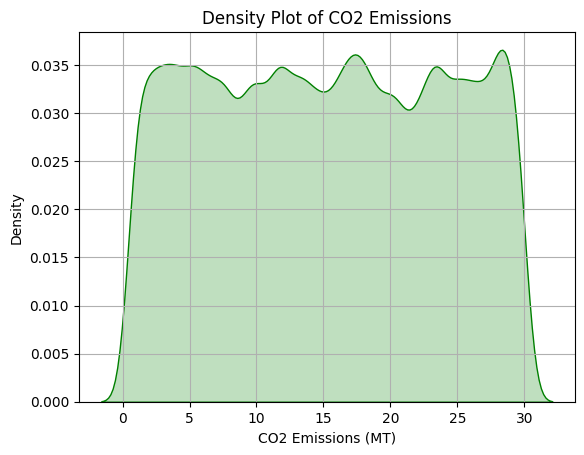

In [45]:
sns.kdeplot(data=df, x='CO2_Emissions_MT', fill=True, color='green', bw_adjust=0.5) #This was created with help from co-pilot
plt.title('Density Plot of CO2 Emissions')
plt.xlabel('CO2 Emissions (MT)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

CO2 follows a non normal almost uniform density distribution, this lends itself to non parametric tests. 

#### Density distribution for temperature 

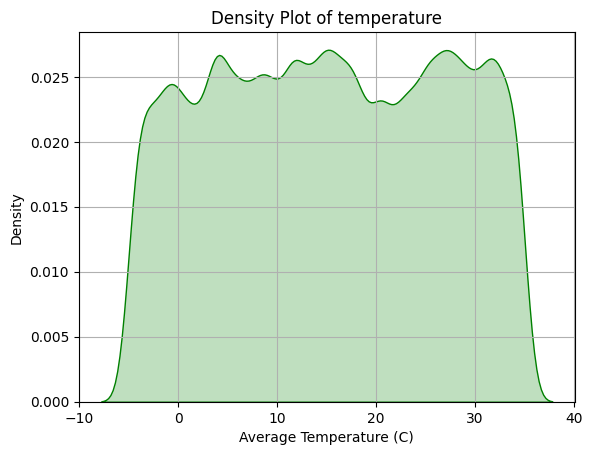

In [46]:
sns.kdeplot(data=df, x='Average_Temperature_C', fill=True, color='green', bw_adjust=0.5) #This was created with help from co-pilot
plt.title('Density Plot of temperature')
plt.xlabel('Average Temperature (C)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Like CO2 temperature also has a fairly uniform density distribution.

#### Spearman Rank Correlation

In [47]:
from scipy.stats import spearmanr

# Run the test
corr, p_val = spearmanr(df['CO2_Emissions_MT'], df['Average_Temperature_C']) #This code was created with help from co-pilot

print(f"Spearman correlation: {corr:.3f}, p-value: {p_val:.3f}")


Spearman correlation: 0.004, p-value: 0.719


There doesn't seem to be any relationship between CO2 and temperature, this result is surprsing. It might be because the dimension of time is missing, we will visualise CO2 and temperature over time in the dashboard section of this project. 